In [355]:
#Chargement des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn




In [356]:
#Chargement du dataset

train=pd.read_csv("C:\\Users\\fred\\ML\\Technohacks\\house-prices-advanced-regression-techniques\\train.csv")
test=pd.read_csv("C:\\Users\\fred\\ML\\Technohacks\\house-prices-advanced-regression-techniques\\test.csv")
df=pd.concat([train,test],axis=0).drop(["SalePrice","Id"],axis=1)
df1=pd.concat([train,test],axis=0).drop(["Id"],axis=1)
pd.set_option("display.max_columns",81)

In [357]:
df.shape

(2919, 79)

In [358]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [359]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [360]:
#pd.set_option("display.max_rows",100)

In [361]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
MasVnrType       0.605002
                   ...   
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
SaleCondition    0.000000
Length: 79, dtype: float64

In [362]:
# Suppression des caracteristiques avec plus de 90% de données manquantes
df.dropna(thresh=0.90*len(df),axis=1,inplace=True)
print(df.shape)

(2919, 72)


In [363]:
object_data=df.select_dtypes("object") #donnees non numeriques
num_data=df.drop([col for col in object_data.columns],axis=1) #données numeriques

In [364]:
#Imputation
from sklearn.impute import KNNImputer,SimpleImputer
imputer=KNNImputer()
imputer1=SimpleImputer(strategy="most_frequent")
num_data[:]=imputer.fit_transform(num_data)
object_data[:]=imputer1.fit_transform(object_data)

In [365]:
ma=[]
for col in object_data:
    print(col,"-----",len((object_data[col].unique())))
    ma.append(len((object_data[col].unique())))
print(max(ma))

MSZoning ----- 5
Street ----- 2
LotShape ----- 4
LandContour ----- 4
Utilities ----- 2
LotConfig ----- 5
LandSlope ----- 3
Neighborhood ----- 25
Condition1 ----- 9
Condition2 ----- 8
BldgType ----- 5
HouseStyle ----- 8
RoofStyle ----- 6
RoofMatl ----- 8
Exterior1st ----- 15
Exterior2nd ----- 16
ExterQual ----- 4
ExterCond ----- 5
Foundation ----- 6
BsmtQual ----- 4
BsmtCond ----- 4
BsmtExposure ----- 4
BsmtFinType1 ----- 6
BsmtFinType2 ----- 6
Heating ----- 6
HeatingQC ----- 5
CentralAir ----- 2
Electrical ----- 5
KitchenQual ----- 4
Functional ----- 7
GarageType ----- 6
GarageFinish ----- 3
GarageQual ----- 5
GarageCond ----- 5
PavedDrive ----- 3
SaleType ----- 9
SaleCondition ----- 6
25


In [366]:
#Encodage des données categorielles

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for col in object_data:
    object_data[col]=encoder.fit_transform(object_data[col])


In [367]:
data=pd.concat([num_data,object_data,train["SalePrice"]],axis=1)[:train.shape[0]]

In [368]:
data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,104.061781,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1977.392055,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,3.028767,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,1.410274,1.075342,9.624658,10.339726,2.539726,3.733562,1.396575,2.280137,2.817123,2.284247,2.789726,4.715753,1.036301,1.538356,0.934932,3.682192,2.339726,5.749315,2.208219,1.228767,3.871918,3.905479,1.856164,7.513014,3.770548,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.843638,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.740602,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.632017,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,0.834998,0.599127,3.197659,3.540570,0.693995,0.731807,0.722394,0.864510,0.650919,1.138472,1.837550,0.925252,0.295124,1.739524,0.246731,1.051301,0.830161,0.979659,1.759864,0.811835,0.594151,0.508297,0.496592,1.552100,1.100854,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.

In [369]:
corr_dict={}
for col in data.columns:
    corr_dict[col]=data.corr()[col]["SalePrice"]
corr_dict

{'MSSubClass': -0.08428413512659509,
 'LotArea': 0.2638433538714051,
 'OverallQual': 0.7909816005838053,
 'OverallCond': -0.07785589404867797,
 'YearBuilt': 0.5228973328794967,
 'YearRemodAdd': 0.5071009671113866,
 'MasVnrArea': 0.47881916028512383,
 'BsmtFinSF1': 0.3864198062421535,
 'BsmtFinSF2': -0.011378121450215146,
 'BsmtUnfSF': 0.21447910554696928,
 'TotalBsmtSF': 0.6135805515591943,
 '1stFlrSF': 0.6058521846919153,
 '2ndFlrSF': 0.31933380283206736,
 'LowQualFinSF': -0.02560613000067955,
 'GrLivArea': 0.7086244776126515,
 'BsmtFullBath': 0.22712223313149427,
 'BsmtHalfBath': -0.01684415429735895,
 'FullBath': 0.5606637627484453,
 'HalfBath': 0.28410767559478256,
 'BedroomAbvGr': 0.16821315430073963,
 'KitchenAbvGr': -0.13590737084214105,
 'TotRmsAbvGrd': 0.5337231555820284,
 'Fireplaces': 0.46692883675152763,
 'GarageYrBlt': 0.503908660802621,
 'GarageCars': 0.6404091972583519,
 'GarageArea': 0.6234314389183622,
 'WoodDeckSF': 0.32441344456812926,
 'OpenPorchSF': 0.3158562271160

<Axes: >

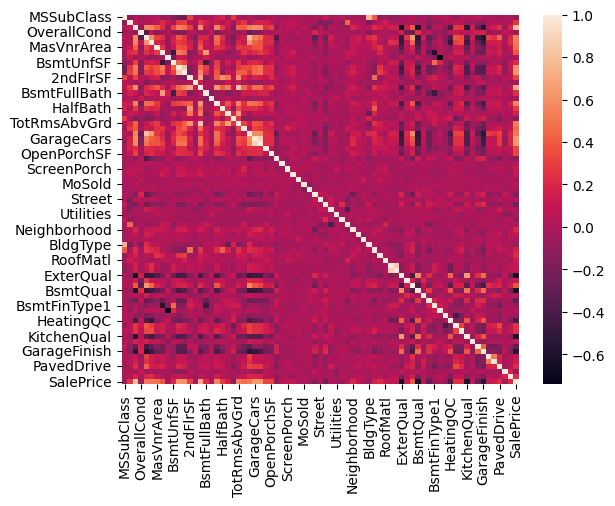

In [370]:
sns.heatmap(data.corr())

In [371]:
#Elimination des caracteristiques pouvant introduire la redondance
correlation_matrix=data.corr().abs()
high_corr_features=set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i,j]>0.8:
            high_corr_features.add((correlation_matrix.columns[i],correlation_matrix.columns[j]))
for feature1,feature2 in high_corr_features:
    if data[feature1].var()>data[feature2].var():
        data.drop(feature2,axis=1,inplace=True)
    else:
         data.drop(feature1,axis=1,inplace=True)

In [372]:
#Elimination des caracacteristiques peu correlées avec le target et  choixde caracteristiques importantes
corr_with_target=data.corr()["SalePrice"].abs()
corr_threshold=0.20
columnstokeep=corr_with_target[corr_with_target>corr_threshold].index

In [373]:
len(columnstokeep)

33

<Axes: >

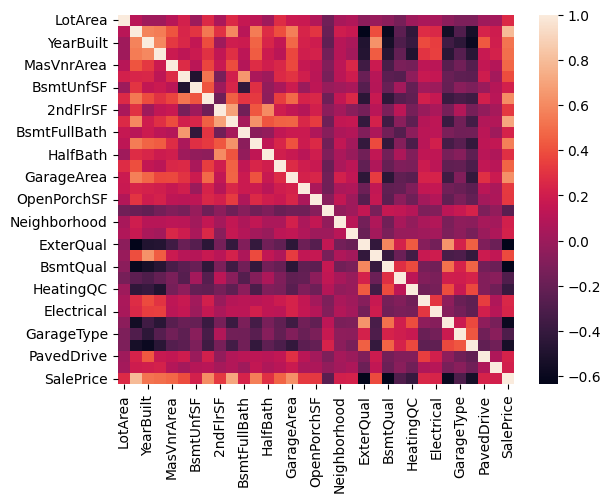

In [374]:
sns.heatmap(data[columnstokeep].corr())

In [375]:
train_set=pd.concat([num_data,object_data],axis=1)[:train.shape[0]]
test_set=pd.concat([num_data,object_data],axis=1)[train.shape[0]:]



In [376]:
print(train_set.shape[0]==train.shape[0])
test_set.shape[0]==test.shape[0]

True


True

In [377]:
y=train["SalePrice"]

In [378]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_set,y,test_size=0.20,random_state=0)


In [379]:

from sklearn.neighbors import  KNeighborsRegressor
from sklearn.linear_model import LinearRegression
models={"KNN":KNeighborsRegressor(n_neighbors=5),
    "LinearRegressor":LinearRegression()}

In [380]:
# Fonction d'entrainement
def training (model,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        print("name:",name)
        model.fit(X_train,y_train)
        print("Score=",model.score(X_test,y_test))
        print("*************")

       


In [381]:
columnstokeep.shape

(33,)

In [382]:
# Recherches des features importantes avec l'algorithme Lasso

from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_squared_error
alphas=[0.01,0.10,1,10,100,1000,100000,1000000]
lasso_cv=LassoCV(alphas=alphas,cv=5)
lasso_cv.fit(X_train,y_train)
a=lasso_cv.alpha_
print("best alpha:",a)
model=Lasso(alpha=a)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.score(X_test,y_test))
selected_features=train_set.columns[model.coef_ !=0]
print("Caracteristiques selectionnées",selected_features.shape)


best alpha: 1000.0
0.6709695861387635
Caracteristiques selectionnées (43,)


C:\Users\fred\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99283665417.29944, tolerance: 579825126.0531945
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fred\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3688707563.290283, tolerance: 579825126.0531945
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fred\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning:

In [383]:
columnstokeep=[i for i in data.columns if (i in columnstokeep and i in selected_features) ]

In [389]:
#Mise à l'echelle des données
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[:]=scaler.fit_transform(X_train)
X_test[:]=scaler.fit_transform(X_test)


In [390]:
training(models,X_train[columnstokeep],y_train,X_test[columnstokeep],y_test)

name: KNN
Score= 0.7184483392010119
*************
name: LinearRegressor
Score= 0.6830501629421816
*************


#Recherche et optimisation de modeles

In [386]:

X=train_set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


In [387]:
X.columns.shape

(72,)

In [388]:
columnstokeep.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# Recherches des features importantes avec l'algorithme Lasso

from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_squared_error
alphas=[0.01,0.10,1,10,100,1000,100000,1000000]
lasso_cv=LassoCV(alphas=alphas,cv=5)
lasso_cv.fit(X_train,y_train)
a=lasso_cv.alpha_
print("best alpha:",a)
model=Lasso(alpha=a)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.score(X_test,y_test))
selected_features=X.columns[model.coef_ !=0]
print("Caracteristiques selectionnées",selected_features.shape)


C:\Users\fred\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99283665417.29944, tolerance: 579825126.0531945
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fred\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3688707563.290283, tolerance: 579825126.0531945
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fred\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning:

best alpha: 1000.0
0.6709695861387635
Caracteristiques selectionnées (43,)


C:\Users\fred\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117052189221.69849, tolerance: 615054159.5739737
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fred\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5532611127.835571, tolerance: 615054159.5739737
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fred\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning

In [ ]:
training(models,X_train[selected_features],y_train,X_test[selected_features],y_test)

name: KNN
Score= 0.6266669346596219
*************
name: LinearRegressor
Score= 0.6793218383849953
*************


In [ ]:
#Mise à l'echelle des données
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
X_train[:]=scaler.fit_transform(X_train)
X_test[:]=scaler.fit_transform(X_test)


In [ ]:
training(models,X_train[selected_features],y_train,X_test[selected_features],y_test)

name: KNN
Score= 0.6246184732845719
*************
name: LinearRegressor
Score= 0.68711598742628
*************


In [ ]:
correlation_matrix=data.corr().abs()
high_corr_features=set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i,j]>0.7:
            high_corr_features.add((correlation_matrix.columns[i],correlation_matrix.columns[j]))
for feature1,feature2 in high_corr_features:
    if data[feature1].var()>data[feature2].var():
        data.drop(feature2,axis=1,inplace=True)
    else:
         data.drop(feature1,axis=1,inplace=True)


In [ ]:
data.shape

(1460, 63)

In [ ]:
data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,854,0,1710,1.0,0.0,2,1,3,1,0,548.0,0,61,0,0,0,0,0,2,2008,3,1,3,3,0,4,0,5,2,2,0,5,1,1,13,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,208500
1,20,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,0,0,1262,0.0,1.0,2,0,3,1,1,460.0,298,0,0,0,0,0,0,5,2007,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4,181500
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,866,0,1786,1.0,0.0,2,1,3,1,1,608.0,0,42,0,0,0,0,0,9,2008,3,1,0,3,0,4,0,5,2,2,0,5,1,1,13,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,223500
3,70,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,756,0,1717,1.0,0.0,1,0,3,1,1,642.0,0,35,272,0,0,0,0,2,2006,3,1,0,3,0,0,0,6,2,2,0,5,1,1,15,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0,140000
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1053,0,2198,1.0,0.0,2,1,4,1,1,836.0,192,84,0,0,0,0,0,12,2008,3,1,0,3,0,2,0,15,2,2,0,5,1,1,13,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0.0,0.0,953.0,953.0,694,0,1647,0.0,0.0,2,1,3,1,1,460.0,0,40,0,0,0,0,0,8,2007,3,1,3,3,0,4,0,8,2,2,0,5,1,1,13,3,4,2,2,3,3,5,5,1,0,1,4,3,6,1,1,4,4,2,8,4,175000
1456,20,13175,6,6,1978,1988,119.0,790.0,163.0,589.0,1542.0,0,0,2073,1.0,0.0,2,0,3,1,2,500.0,349,0,0,0,0,0,0,2,2010,3,1,3,3,0,4,0,14,2,2,0,2,1,1,10,3,4,1,2,3,3,0,4,1,4,1,4,3,2,1,2,4,4,2,8,4,210000
1457,70,9042,7,9,1941,2006,0.0,275.0,0.0,877.0,1152.0,1152,0,2340,0.0,0.0,2,0,4,1,2,252.0,0,60,0,0,0,0,2500,5,2010,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,0,2,4,3,1,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,266500
1458,20,9717,5,6,1950,1996,0.0,49.0,1029.0,0.0,1078.0,0,0,1078,1.0,0.0,1,0,2,1,0,240.0,366,0,112,0,0,0,0,4,2010,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,3,4,1,3,3,2,2,4,1,2,1,0,2,6,1,2,4,4,2,8,4,142125


In [ ]:
RNN_model=Sequential()

In [ ]:
RNN_model.add(Dense(units=1,kernel_initializer="uniform",input_dim=len(selected_features)))
RNN_model.add(Activation("relu"))


In [ ]:
RNN_model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mean_squared_error"])

In [ ]:
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 44        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 44 (176.00 Byte)
Trainable params: 44 (176.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history1=RNN_model.fit(X_train[selected_features],y_train,epochs=1000)

Epoch 1/1000
37/37 [==============================] - 2s 2ms/step - loss: 38848794624.0000 - mean_squared_error: 38848794624.0000
Epoch 2/1000
37/37 [==============================] - 0s 2ms/step - loss: 38848753664.0000 - mean_squared_error: 38848753664.0000
Epoch 3/1000
37/37 [==============================] - 0s 2ms/step - loss: 38848708608.0000 - mean_squared_error: 38848708608.0000
Epoch 4/1000
37/37 [==============================] - 0s 2ms/step - loss: 38848667648.0000 - mean_squared_error: 38848667648.0000
Epoch 5/1000
37/37 [==============================] - 0s 2ms/step - loss: 38848618496.0000 - mean_squared_error: 38848618496.0000
Epoch 6/1000
37/37 [==============================] - 0s 2ms/step - loss: 38848581632.0000 - mean_squared_error: 38848581632.0000
Epoch 7/1000
37/37 [==============================] - 0s 2ms/step - loss: 38848540672.0000 - mean_squared_error: 38848540672.0000
Epoch 8/1000
37/37 [==============================] - 0s 2ms/step - loss: 38848495616.0000

In [ ]:
history2=RNN_model.fit(X_test[selected_features],y_test,epochs=1000)

Epoch 1/1000
10/10 [==============================] - 0s 2ms/step - loss: 39758114816.0000 - mean_squared_error: 39758114816.0000
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 39758094336.0000 - mean_squared_error: 39758094336.0000
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 39758090240.0000 - mean_squared_error: 39758090240.0000
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 39758077952.0000 - mean_squared_error: 39758077952.0000
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 39758061568.0000 - mean_squared_error: 39758061568.0000
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 39758053376.0000 - mean_squared_error: 39758053376.0000
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 39758041088.0000 - mean_squared_error: 39758041088.0000
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 39758032896.0000

KeyboardInterrupt: 

In [ ]:
acc = history1.history['mean_squared_error']
valid_acc=history2.history['mean_squared_error']

loss = history1.history['loss']
valid_loss=history2.history['loss']
epochs = len(acc)
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),valid_acc,label = "test acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

: 

In [ ]:
RNN_model.evaluate(X_test[selected_features],y_test)

: 